# Matplotlib Assignment

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
1.Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
2.Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [40]:
import pandas as pd
import numpy as np

In [16]:
data = {'temp_max': [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25], 
        'temp_min': [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]}  
df = pd.DataFrame.from_dict(data) 

In [17]:
df

,temp_max,temp_min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


Text(0, 0.5, 'Temperature')

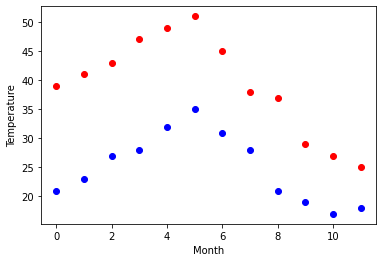

In [41]:
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, df.temp_max, 'ro')
plt.plot(months, df.temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [19]:
#Fitting into function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      df.temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      df.temp_min, [-40, 20, 0])

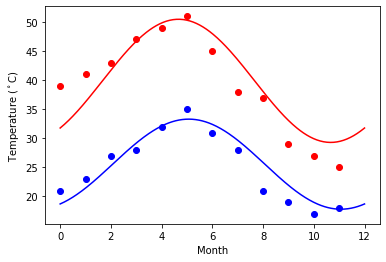

In [20]:
#2.Plot
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, df.temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, df.temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [21]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [24]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [35]:
prop = titanic.sex.value_counts(normalize=True) * 100

In [36]:
prop

male      64.400306
female    35.599694
Name: sex, dtype: float64

([<matplotlib.patches.Wedge at 0xf92a240>,
 [Text(-0.48083695746705835, 0.9893411041363956, 'male'),
  Text(0.48083705009585487, -0.9893410591171867, 'female')],
 [Text(-0.2622747040729409, 0.5396406022562157, '64.4%'),
  Text(0.262274754597739, -0.5396405777002836, '35.6%')])

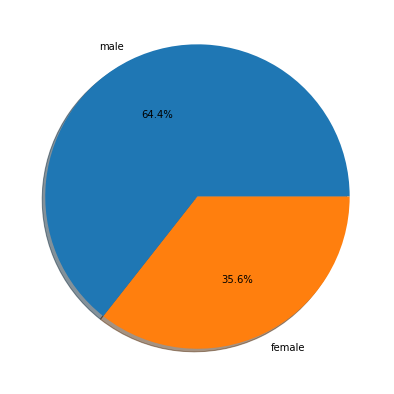

In [42]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(prop,autopct = '%1.1f%%' , shadow = True,labels = ['male','female'])

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

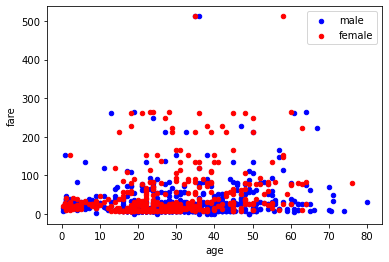

In [44]:
plt.figure()
category1 = titanic[titanic.sex == 'male'].plot.scatter('age','fare',color = 'blue',label = 'male')
titanic[titanic.sex == 'female'].plot.scatter('age','fare',color = 'red',label = 'female',ax = category1)
